# Import packages

In [49]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
import os,re
from pickle import FALSE
import pandas as pd
import requests
import numpy  as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize , word_tokenize
import string
import sklearn
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from textblob import Sentence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wikipedia
from tokenizer import split_into_sentences
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [45]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

# Basic Data Clean
Employing a Python parser script (and munnally copy 5 left speeches) , we obtain those 100 speeches in seprate txt files in floder Speech100.

In [ ]:
%run crawler.py

In [ ]:
# read documments
path="Speech100\\"
files= os.listdir(path)  
# sort the documents
def sort_filenames(filenames):
   filenames.sort(key=lambda x: list(map(eval, re.findall("(\d+)", x))))   

sort_filenames(files)
files

In [38]:
lecturers=[]
years=[]
title=[]
speech_docs=[]  

for i in range(100):
    print(files[i])
    raw_speech=' '
    file= path +files[i]
    with open(file, 'r', encoding='UTF-8') as f:
        content= [line.strip() for line in f if len(line)!=1]  
        #Title
        title.append(content[0])
        #Regular match year (\d{4})
        Year=re.findall("\d{4}",content[2])
        if len(Year) == 0: 
            years.append("")
        else: years.append(Year[0])
        #Speaker
        lecturer=content[1]
        lecturers.append(lecturer)
        #Content of the speech
        speech_doc= raw_speech.join(content[3:])
        speech_docs.append(speech_doc)
              
# Check 100       
len(speech_docs)

1 I Have A Dream.txt
2 Inaugural Address.txt
3 First Inaugural Address.txt
4 Pearl Harbor Address to the Nation.txt
5 1976 DNC Keynote Address.txt
6 Checkers.txt
7 The Ballot or the Bullet.txt
8 Shuttle 'Challenger' Disaster Address.txt
9 Houston Ministerial Association.txt
10 We Shall Overcome.txt
11 1984 DNC Keynote Address.txt
12 1984 DNC Address.txt
13 On the Articles of Impeachment.txt
14 Farewell Address to Congress.txt
15 I've Been to the Mountaintop.txt
16 The Man with the Muck-rake.txt
17 Remarks on the Assassination of MLK.txt
18 Farewell Address.txt
19 War Message.txt
20 Duty, Honor, Country.txt
21 The Great Silent Majority.txt
22 Ich bin ein Berliner.txt
23 Mercy for Leopold and Loeb.txt
24 Acres of Diamonds.txt
25 A Time for Choosing.txt
26 Every Man a King.txt
27 Fundamental Principle of a Republic.txt
28 The Arsenal of Democracy.txt
29 The Evil Empire.txt
30 First Inaugural Address.txt
31 First Fireside Chat.txt
32 The Truman Doctrine.txt
33 Nobel Prize Acceptance Speech

100

# Data process
### Clean Speeches
Functions for text cleaning of raw transcript

In [39]:
%run clean.py

In [46]:
# Create index
data={"Title":title,"Lecturer":lecturers,"Year":years,"Doc":speech_docs}
df_speech_1=pd.DataFrame(data)
pd.DataFrame(data)
clean(df_speech_1,"Doc")

,Title,Lecturer,Year,Doc,clean
0,I Have A Dream,"Martin Luther King, Jr.",1963,I am happy to join with you today in what will...,happy history great demonstration freedom hist...
1,Inaugural Address,John Fitzgerald Kennedy,1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",johnson speaker chief justice eisenhower nixon...
2,First Inaugural Address-Franklin Delano Roosevelt,Franklin Delano Roosevelt,1933,"President Hoover, Mr. Chief Justice, my friend...",hoover chief justice friend national consecrat...
3,Pearl Harbor Address to the Nation,Franklin Delano Roosevelt,1941,"Mr. Vice President, Mr. Speaker, Members of th...",speaker members senate house representatives y...
4,1976 DNC Keynote Address,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,gentleman reception member democratic party co...
...,...,...,...,...,...
95,Let Us Continue,Lyndon Baines Johnson,1963,"Mr. Speaker, Mr. President, Members of the Hou...",speaker members house members senate fellow gl...
96,Have You Left No Sense of Decency,Joseph N. Welch,1954,"Senator McCarthy: Mr. Chairman, in view of tha...",senator mccarthy chairman request senator mcca...
97,The Declaration of Human Rights,Anna Eleanor Roosevelt,1948,"Mr. President, fellow delegates: The long and ...",fellow delegate meticulous study debate univer...
98,Day of Affirmation Address at Cape Town Univer...,Robert Francis Kennedy,1966,"Mr. Chancellor, Mr. Vice Chancellor, Professor...",chancellor chancellor professor robertson diam...


In [ ]:
df_speech_1.Doc[86]

### Google Lectures
Functions for web scraping with selenium
1. Google speaker
2. Google institute
3. Google institute on Google Map

In [55]:
%run google.py

D:\Desktop\2nd_semester\Modern_Data_Analytics\Assignment\Github\google.py:25: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver)


In [56]:
results_speaker = []
for speaker in lecturers:
    result = google_speaker(speaker)
    results_speaker.append(result)

pd.DataFrame(results_speaker)

,speaker,profession,birth,born
0,"Martin Luther King, Jr.",American minister,"Born: January 15, 1929, Atlanta, Georgia, Unit...",1929
1,John Fitzgerald Kennedy,35th U.S. President,"Born: May 29, 1917, Brookline, Massachusetts, ...",1917
2,Franklin Delano Roosevelt,32nd U.S. President,"Born: January 30, 1882, Hyde Park, New York, U...",1882
3,Franklin Delano Roosevelt,32nd U.S. President,"Born: January 30, 1882, Hyde Park, New York, U...",1882
4,Barbara Charline Jordan,Former United States Representative,"Born: February 21, 1936, Houston, Texas, Unite...",1936
...,...,...,...,...
95,Lyndon Baines Johnson,36th U.S. President,"Born: August 27, 1908, Stonewall, Texas, Unite...",1908
96,Joseph N. Welch,American lawyer,"Born: October 22, 1890, Primghar, Iowa, United...",1890
97,Anna Eleanor Roosevelt,Former First Lady of the United States,"Born: October 11, 1884, New York, New York, Un...",1884
98,Robert Francis Kennedy,Former United States Attorney General,"Born: November 20, 1925, Brookline, Massachuse...",1925


In [66]:
party = []
for person in lecturers:
    try:
        result = wikipedia.summary(person)
    except Exception as e:
        pass
    if 'Democratic Party' in result:
        party.append("Democratic")
    elif 'Republican Party' in result:
        party.append("Republican")
    else: party.append("Null")

In [ ]:
gender = []
for person in lecturers:
    try:
        result = wikipedia.summary(person)
    except Exception as e:
        pass
    if 'She' in result:
        gender.append("female")
    elif 'He' in result:
        gender.append("male")
    elif (person=="Joseph N. Welch"):
        gender.append("male")

In [68]:
# Clean up the born column
speaker_info = pd.DataFrame(results_speaker)
speaker_info['born'] = speaker_info['born'].apply(str).apply(lambda x: x.split(' ')[0])
speaker_info.drop(columns=['birth'],inplace=True)
speaker_info["gender"]=gender
speaker_info["party"]=party
speaker_info.loc[44,["profession","born"]]=["former First Lady of the U.S.","1925"]
# speaker_info[speaker_info['profession'].isna()] # no NA
speaker_info.to_csv("speaker_info.csv")

In [69]:
speaker_info=pd.read_csv("speaker_info.csv",index_col= 0)
# pd.merge
df_speech= df_speech_1.join(speaker_info)
df_speech["age_then"] = pd.to_numeric(df_speech["Year"],errors='coerce')- pd.to_numeric(df_speech["born"])
df_speech=df_speech.drop(columns=["speaker","born"])
df_speech.to_csv("speech100.csv")

### Profession

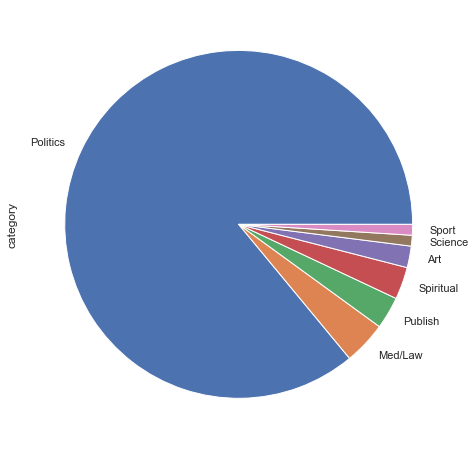

In [70]:
professions=df_speech["profession"].to_list()

# Profession Classification
publish = ['Romanian-American writer',"American author","Writer"]
med_law = ['American lawyer']
art = ["American child actor","American artist"]
sport = ["Baseball first baseman"]
science = ["Physician"]
spiritual=["a labor leader, activist, and feminist","American civil rights activist","an American women's suffrage leader"]
category =[]

for profession in professions:
    if any(x in profession for x in publish):
        category.append('Publish')
    elif any(x in profession for x in med_law):
        category.append('Med/Law')
    elif any(x in profession for x in art):
        category.append('Art')
    elif any(x in profession for x in sport):
        category.append('Sport')
    elif any(x in profession for x in science):
        category.append('Science')
    elif any(x in profession for x in spiritual):
        category.append('Spiritual')
    else:
        category.append('Politics')

df_speech['category'] = category
df_speech

plt.rcParams['figure.figsize'] = [20, 8]
df_speech.category.value_counts().plot(kind='pie');

### Age

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_then', ylabel='Density'>

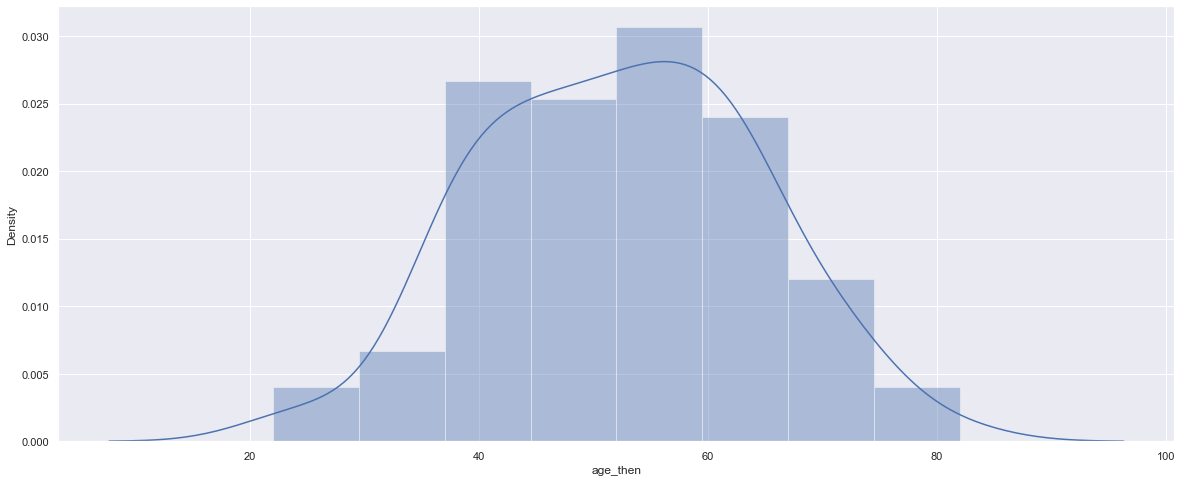

In [71]:
# Age
# Histogram
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(df_speech.age_then)

### Top words counts

d:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


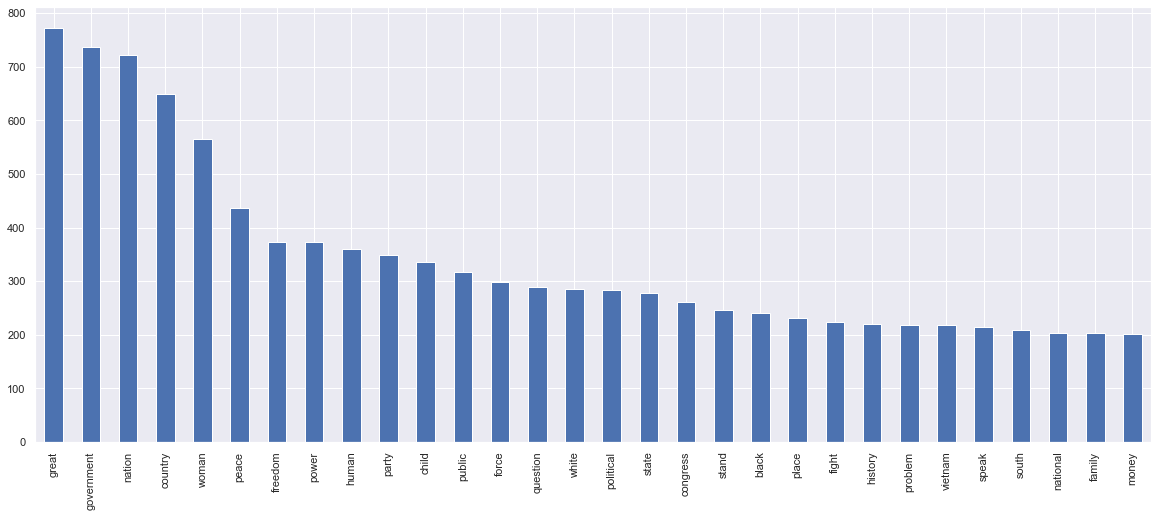

In [72]:
# ## Top30 Common words in all speech
df=df_speech  
# Creating a document-term matrix
# Most common words in every speech
# Count Vectorizer

vect = CountVectorizer(stop_words=stop_words)  
vects = vect.fit_transform(df.clean)

td = pd.DataFrame(vects.todense()).iloc[:]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(100)]
term_documents=term_document_matrix
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 30 words
term_document_matrix_top = term_document_matrix.sort_values(by ='total_count',ascending=False)[:30] 
# People ,government, great, country, states, united, property, nation, president, women ...
term_document_matrix_top['total_count'].plot.bar()
plt.show() 


In [73]:
# top 30 words total
term_document_matrix_top

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 91,Doc 92,Doc 93,Doc 94,Doc 95,Doc 96,Doc 97,Doc 98,Doc 99,total_count
great,6,1,7,0,1,7,0,3,4,12,...,8,8,4,17,2,1,5,12,3,773
government,0,1,4,3,8,11,25,0,0,5,...,1,0,1,5,7,3,5,11,0,738
nation,11,6,5,3,6,0,2,1,12,12,...,5,1,2,5,9,0,2,13,1,722
country,1,6,1,0,2,3,17,1,6,11,...,2,1,2,0,1,0,4,13,35,649
woman,0,0,0,0,0,0,1,1,0,3,...,1,0,0,2,0,0,0,6,0,566
peace,0,4,0,3,0,1,0,0,0,4,...,5,2,1,5,6,0,1,3,1,437
freedom,20,4,0,0,0,0,11,1,6,5,...,17,0,0,0,1,0,7,13,2,374
power,0,7,3,0,1,0,12,0,3,1,...,1,0,2,7,2,1,0,4,4,374
human,0,3,1,0,0,0,5,0,0,3,...,6,7,1,0,0,0,13,19,3,361
party,0,1,0,0,16,2,9,0,2,4,...,0,0,0,1,0,5,0,1,0,348


### Top  words in every speech

In [74]:
word_counts = {}
count_vectorizer = CountVectorizer(stop_words=stop_words)

#Getting the top occurring words in the corpus
def get_top_n_words(n_top_words,count_vectorizer, text_data):
    vectorized_sents = count_vectorizer.fit_transform(text_data)
    vectorized_total = np.sum(vectorized_sents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_sents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

# get top 25 words in clean columns
get_top_n_words(n_top_words=25, count_vectorizer=count_vectorizer, text_data=df.clean)

# get top 25  words  in every speech
word_counts = {}
counts = {}
def get_counts(df,index,target):
    counts = {}
    for i in df[index]:
        text = df[df[index]==i][target]
        words, word_values = get_top_n_words(n_top_words=25,count_vectorizer=count_vectorizer, text_data=pd.Series(text))
        counts[i] = words
    return counts

word_counts = get_counts(df,index="Title",target="clean")
word_counts

# get final 25 words in every speech
speech_top_word = pd.DataFrame.from_dict(word_counts, orient='index')
speech_top_word

d:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
I Have A Dream,freedom,negro,dream,nation,satisfy,justice,white,great,mountain,check,...,valley,georgia,injustice,brotherhood,slave,alabama,place,stand,content,dignity
Inaugural Address,power,pledge,nation,country,citizen,negotiate,generation,freedom,fellow,support,...,poverty,human,struggle,burden,friend,commit,south,finally,finish,forebear
First Inaugural Address-Franklin Delano Roosevelt,national,leadership,action,great,effort,nation,money,measure,discipline,public,...,congress,neighbor,constitutional,problem,essential,trade,truth,balance,restore,return
Pearl Harbor Address to the Nation,japanese,attack,force,japan,yesterday,island,night,state,government,nation,...,attacked,december,secretary,ambassador,armed,naval,congress,reply,formal,blinking
1976 DNC Keynote Address,party,common,national,future,public,belief,government,democratic,community,official,...,concept,restore,uphold,participate,political,require,barbara,shape,private,principle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let Us Continue,action,dream,strong,nation,strength,government,kennedy,peace,national,continue,...,delay,forward,equal,fight,foreign,commitment,cooperation,pending,serve,members
Have You Left No Sense of Decency,welch,senator,mccarthy,communist,committee,fisher,mundt,chairman,belong,organization,...,party,sundown,personal,listen,member,point,assistant,bring,attention,counsel
The Declaration of Human Rights,declaration,article,human,state,soviet,amendment,rights,assembly,principle,freedom,...,document,common,great,general,public,basic,provision,nations,country,economic
Day of Affirmation Address at Cape Town University,human,young,nation,freedom,country,great,government,history,danger,south,...,individual,stand,problem,belief,common,kennedy,build,courage,opportunity,progress


### TF-IDF

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

texts = df.clean.tolist()
count_vectorizer = CountVectorizer()
x= count_vectorizer.fit_transform(texts)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(x)
df_word_tf_idf = pd.DataFrame(tfidf.toarray(),columns=count_vectorizer.get_feature_names_out())
tfidf_df = df_word_tf_idf.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf[top_tfidf['term'].str.contains('american')]

import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['war', 'peace',"free"]

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

### Wordcloud
World cloud for first 16 speeches

In [78]:
%run word_cloud.py

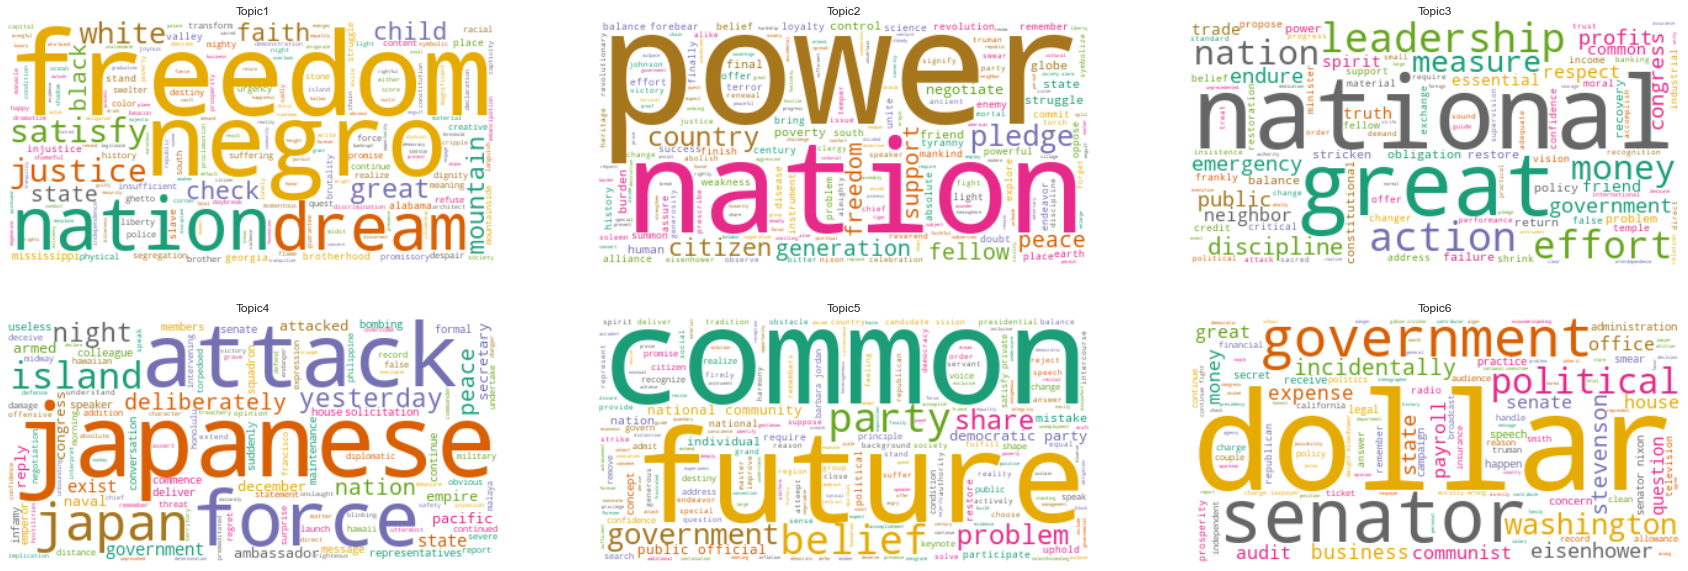

In [79]:
show_word_cloud(df,"clean",stop_words,collocation_threshold = 30)  #first 16 speeches

###  Year
Speech distribution by year

d:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

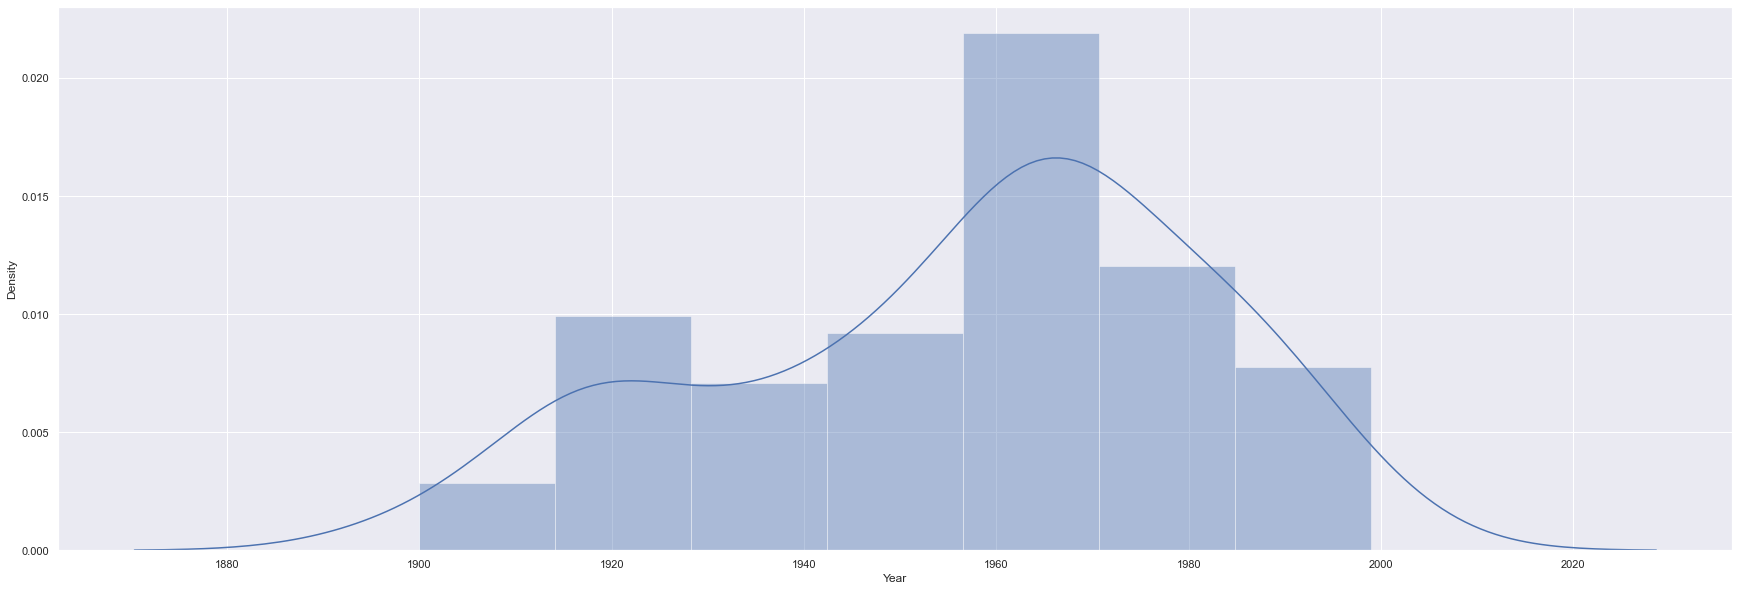

In [80]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(df_speech.Year)